## Exploratory Analysis
There are thirteen features and one target as below:

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn import preprocessing
import itertools
#from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb

from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import roc_curve, auc
#from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
#from sklearn.ensemble import GradientBoostingClassifier
#import eli5
#from eli5.sklearn import PermutationImportance
#import shap
#from mpl_toolkits.mplot3d import Axes3D

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import umap 
import matplotlib.pyplot as plt
import seaborn as sns 

#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn import svm, datasets
#from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster import DBSCAN
#from sklearn.cluster import KMeans
#from scipy.cluster.hierarchy import dendrogram

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular learning method utilized in model building and machine learning algorithms. This is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density.

In [3]:
df = pd.read_csv("C:/Users/Dell/Documents/heart_project1/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_target = df.groupby("target").size()
df_target

target
0    138
1    165
dtype: int64

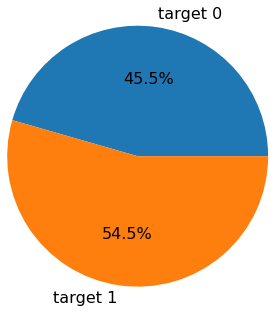

In [5]:
plt.pie(df_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

Over 50% people who was diagnosed heart disease

In [6]:
df_gen = df.groupby(["sex","target"]).size()
df_gen

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

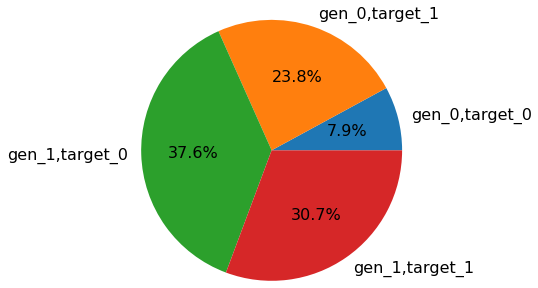

In [7]:
plt.pie(df_gen.values, labels = ["gen_0,target_0", "gen_0,target_1", "gen_1,target_0", "gen_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

The ratio of male has heart disease is 30.7%, a little bit higher than female.

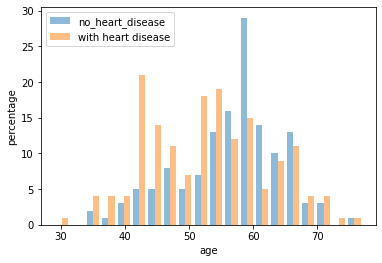

In [8]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
scorexgb=97
plt.ylabel("percentage")
plt.legend()
plt.show()


The ratio get higher over the age of forty. That is, people who is over forty is under high risk of heart disease.

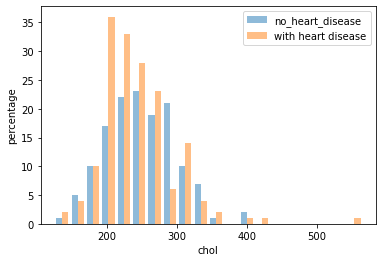

In [9]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

Also, amounts of people having heart disease are over 200mg/dl of chol. According to the research, the normal value of chol should be lower than 200mg/dl.

How about the resting blood pressure?



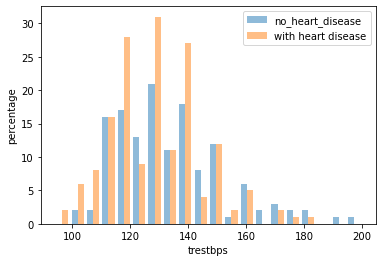

In [10]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ideal blood pressure should be lower than 120 mmHg. Whether the patients have heart disease or not , over 50% patients have higher blood pressure.

Maximum heart rate is negatively related to the age. Let's see the distribution.

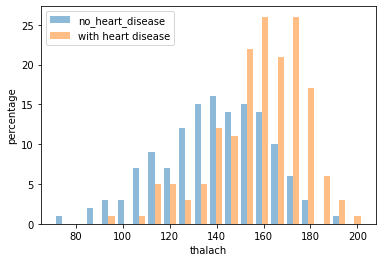

In [11]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"]) 
plt.xlabel("thalach")
plt.ylabel("percentage")

plt.legend()
plt.show()

Interesting outcome. It seems that the medium of patient with heart disease is higher.

Before modeling the dataset, let's find out if there are outliers inside the dataset. We check the contineous data by boxplot.

In [12]:
df_1 = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_1.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


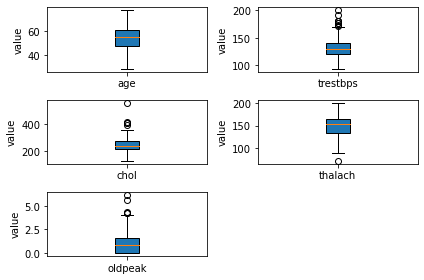

In [13]:
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

There are outliers in each features except age. We define the outliers that are not in the range of 3 sigma. Then remove the outliers.

In [14]:
infor = df.describe()

df2 = df[df.trestbps < infor.loc["mean", "trestbps"] + 3 * infor.loc["std", "trestbps"]]
df3 = df2[df.chol < infor.loc["mean", "chol"] + 3 * infor.loc["std", "chol"]]
df4 = df3[df.thalach > infor.loc["mean", "thalach"] - 3 * infor.loc["std", "thalach"]]
df_new = df4[df.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Replace the name of category data and seperate them into different columns.

In [15]:
df_new.cp = df_new.cp.map({0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"})
df_new.sex = df_new.sex.map({0:"Female", 1:"Male"}) 
df_new.exang = df_new.exang.map({0:"exercise did not induce angina", 1:"exercise induced angina"})
df_new.slope = df_new.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
df_new.thal = df_new.thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
df_new = pd.get_dummies(df_new, drop_first = True)
df_new.head(10)


,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,exang_exercise induced angina,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,0,150,2.3,0,1,1,0,1,0,0,0,1,0
1,37,130,250,0,1,187,3.5,0,1,1,1,0,0,0,0,0,0
2,41,130,204,0,0,172,1.4,0,1,0,0,0,1,0,0,0,0
3,56,120,236,0,1,178,0.8,0,1,1,0,0,1,0,0,0,0
4,57,120,354,0,1,163,0.6,0,1,0,0,0,0,1,0,0,0
5,57,140,192,0,1,148,0.4,0,1,1,0,0,0,0,1,1,0
6,56,140,294,0,0,153,1.3,0,1,0,0,0,1,0,1,0,0
7,44,120,263,0,1,173,0.0,0,1,1,0,0,1,0,0,0,1
8,52,172,199,1,1,162,0.5,0,1,1,1,0,0,0,0,0,1
9,57,150,168,0,1,174,1.6,0,1,1,1,0,0,0,0,0,0


In [16]:
df_new.shape

(294, 17)

## SMOTE + ENN

In [17]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

In [18]:
def test_sample_regular_pass_smote_enn():
    smote = SMOTEENN(
        smote=SMOTE(SMOTEmpling_strategy="auto", random_state=RND_SEED),
        enn=EditedNearestNeighbours(sampling_strategy="all"),
        random_state=RND_SEED,
    )
    X_resampled, y_resampled = smote.fit_resample(X, Y)

Define the dataset for training and testing.

In [19]:
sm = SMOTEENN()
X = df_new.drop("target", 1).values
y = df_new["target"].astype("int").values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [20]:
from sklearn.model_selection import train_test_split

predictors = df_new.drop("target",axis=1)
target = df_new["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [21]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
Obj="binary:logistic"
xgb_model = xgb.XGBClassifier(objective=Obj, random_state=42) 
                                                                                                                                  
xgb_model.fit(X_train, Y_train, eval_metric='error')

Y_pred_xgb = xgb_model.predict(X_test)

In [22]:
Y_pred_xgb.shape

(59,)

In [23]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(scorexgb)+" %")

The accuracy score achieved using XGBoost is: 97 %


To see which factors are significantly affect the heart disease, Xgboost library is a easy way to predict the result. We should optimize the parameters first, so we assume different max depth of classification, learning rate and number of trees. 

Secondly, use crossvalid method to make sure the parameters is optimised.

